In [1]:
import pandas as pd
import numpy as np

In [2]:
df1=pd.read_pickle("tw_pos.pkl")
df2=pd.read_pickle("tw_pos_score1.pkl")
df_pos=pd.concat([df1,df2],axis=0).reset_index(drop=True)

In [3]:
df3=pd.read_pickle("tw_neg.pkl")
df4=pd.read_pickle("tw_neg_score1.pkl")
df_neg=pd.concat([df3,df4],axis=0).reset_index(drop=True)

In [24]:
df_pos.to_csv("pos.csv",index=False)
df_neg.to_csv("neg.csv",index=False)

In [4]:
df5=pd.read_csv("pos.csv")
df6=pd.read_csv("neg.csv")
df_final=pd.concat([df5,df6],axis=0)

In [5]:
df_final["label"].value_counts()

negativo    258
positivo    142
Name: label, dtype: int64

In [6]:
def quitar_acentos(texto):
    juntar=(" ").join(texto)
    juntar=juntar.replace("á","a")
    juntar=juntar.replace("é","e")
    juntar=juntar.replace("í","i")
    juntar=juntar.replace("ó","o")
    juntar=juntar.replace("ú","u")
    lista_final=juntar.split()
    return lista_final

In [7]:
from nltk.corpus import stopwords
stop=stopwords.words('spanish')

In [8]:
stop=quitar_acentos(stop)

In [9]:
from sklearn.model_selection import train_test_split

tw_train, tw_test, label_train, label_test = train_test_split(df_final["tweet"], df_final['label'], test_size=0.20)

In [16]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

In [17]:
pipeline = Pipeline([
    ('bow', CountVectorizer(stop_words=stop)), 
    ('classifier', MultinomialNB()),  
])

In [18]:
pipeline.fit(tw_train,label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(stop_words=['de', 'la', 'que', 'el', 'en', 'y',
                                             'a', 'los', 'del', 'se', 'las',
                                             'por', 'un', 'para', 'con', 'no',
                                             'una', 'su', 'al', 'lo', 'como',
                                             'mas', 'pero', 'sus', 'le', 'ya',
                                             'o', 'este', 'si', 'porque', ...])),
                ('classifier', MultinomialNB())])

In [19]:
predictions = pipeline.predict(tw_test)

In [20]:
from sklearn.metrics import confusion_matrix,classification_report

In [21]:
print(confusion_matrix(label_test,predictions))
print('\n')
print(classification_report(label_test,predictions))

[[43  8]
 [12 17]]


              precision    recall  f1-score   support

    negativo       0.78      0.84      0.81        51
    positivo       0.68      0.59      0.63        29

    accuracy                           0.75        80
   macro avg       0.73      0.71      0.72        80
weighted avg       0.74      0.75      0.75        80



In [30]:
df=pd.read_pickle("final_df.pkl").reset_index(drop=True)

In [31]:
predictions_final=pipeline.predict(df["tweet"])

In [32]:
df["label"]=predictions_final

In [33]:
df["label"].value_counts()

negativo    24174
positivo    10385
Name: label, dtype: int64

In [46]:
df_sent=df.groupby(["mes","dia","label"]).count()["tweet"]

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid",
        rc={
            "text.color": "black",
            "axes.labelcolor": "black",
            "axes.edgecolor": "black",
            "xtick.color": "black",
            "ytick.color": "black",
            "axes.facecolor": "#FFFFFF",
            "figure.facecolor": "#F5F8FA"}
        )

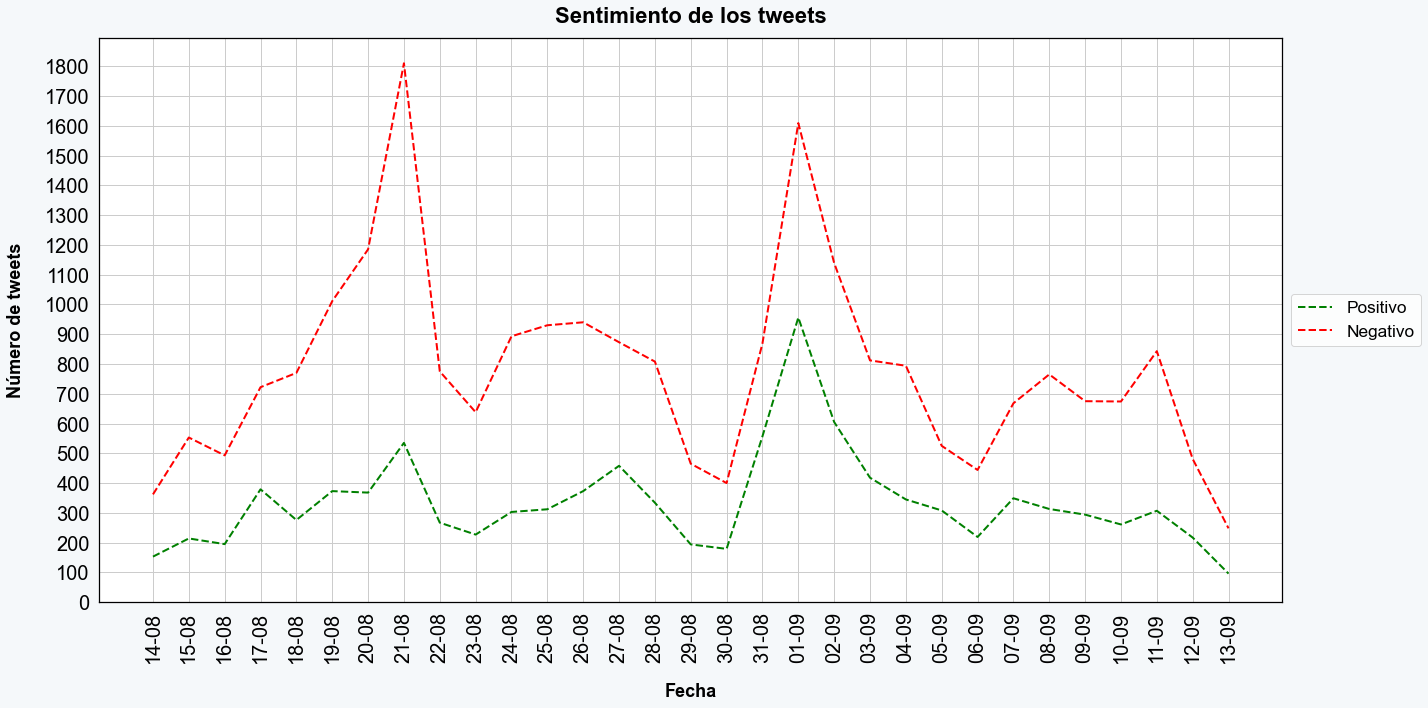

In [55]:
df_sent.xs("positivo",level=2).plot(lw=2,ls="--",color="green",figsize=(20,10),label="Positivo")
df_sent.xs("negativo",level=2).plot(lw=2,ls="--",color="red",figsize=(20,10),label="Negativo")
plt.xticks(ticks=np.arange(0, df["fecha_str"].nunique()),labels=df["fecha_str"].unique(),size=20,rotation=90)
plt.yticks(np.arange(0, 1900 , 100),size=20)
plt.title("Sentimiento de los tweets",weight="bold",pad=15,size=22)
plt.xlabel("Fecha",weight="bold",labelpad=20,size=18)
plt.ylabel("Número de tweets",weight="bold",labelpad=20,size=18)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),fontsize="x-large")
plt.tight_layout()